<a href="https://colab.research.google.com/github/alexdyul/Network/blob/main/HW_2_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from google.colab import files
files.upload()

Saving vk_edges.csv to vk_edges (1).csv


{'vk_edges.csv': b'Source,Target,Type,Id,Label,timeset,Weight\r\n227657,1687066,Directed,1,,,1\r\n227657,1895348,Directed,2,,,1\r\n227657,15604345,Directed,3,,,1\r\n227657,270477814,Directed,4,,,1\r\n413300,3864197,Directed,5,,,1\r\n413300,3905784,Directed,6,,,1\r\n413300,5349199,Directed,7,,,1\r\n413300,6218698,Directed,8,,,1\r\n413300,31321482,Directed,9,,,1\r\n413300,39207926,Directed,10,,,1\r\n1601280,1990478,Directed,11,,,1\r\n1601280,2583166,Directed,12,,,1\r\n1601280,8837849,Directed,13,,,1\r\n1601280,61819107,Directed,14,,,1\r\n1601280,142929208,Directed,15,,,1\r\n1601280,151521615,Directed,16,,,1\r\n1601280,186301632,Directed,17,,,1\r\n1601280,263420880,Directed,18,,,1\r\n1601280,385370289,Directed,19,,,1\r\n1601280,508267550,Directed,20,,,1\r\n1687066,227657,Directed,21,,,1\r\n1687066,1895348,Directed,22,,,1\r\n1687066,15604345,Directed,23,,,1\r\n1687066,55826326,Directed,24,,,1\r\n1687066,270477814,Directed,25,,,1\r\n1895348,227657,Directed,26,,,1\r\n1895348,1687066,Directed

In [59]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
%matplotlib inline

In [60]:
edges = pd.read_csv("vk_edges.csv")
edges.shape

(2012, 7)

In [61]:
edges1 = edges.drop_duplicates()
edges1.shape

(2012, 7)

In [62]:
graph = nx.from_pandas_edgelist(edges1, 'Source', 'Target')

In [63]:
print("Number of nodes: {}".format(len(graph.nodes())))
print("Number of edges: {}".format(len(graph.edges())))
print("Average degree of nodes: {0:.2f}".format(len(graph.edges())/len(graph.nodes())))
print("Connected graph - {}".format(nx.is_connected(graph)))

Number of nodes: 216
Number of edges: 1017
Average degree of nodes: 4.71
Connected graph - False


Стандартная статистика показывает, что средняя степень вершины довольно высока/ граф несвязный, есть вершины, не имеющие связей

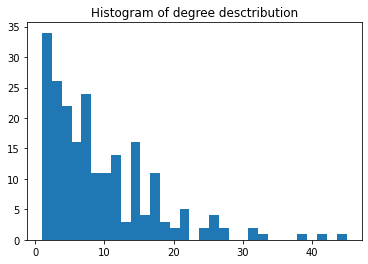

In [64]:
degree_view = nx.degree(graph)
degree_values = dict(degree_view).values()
plt.hist([i for i in list(degree_values)], bins = len(set(degree_values)))
plt.title("Histogram of degree desctribution")
plt.show()

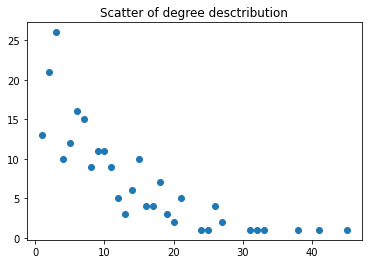

In [65]:
from collections import Counter
res = Counter(list(dict(degree_view).values()))
plt.title("Scatter of degree desctribution")
plt.scatter(res.keys(), res.values())
plt.show()

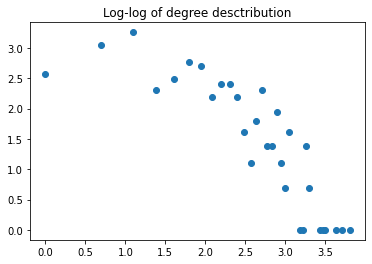

In [66]:
import math
plt.title("Log-log of degree desctribution")
plt.scatter([math.log(i) for i in res.keys()], [math.log(i) for i in res.values()])
plt.show()

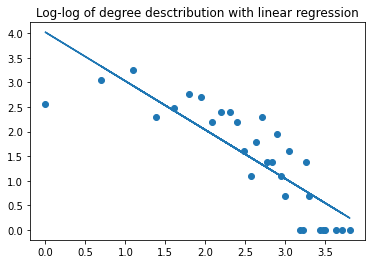

In [67]:
import numpy as np
x = np.array([math.log(i) for i in res.keys()])
y = np.array([math.log(i) for i in res.values()])
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, m*x + b)
plt.title("Log-log of degree desctribution with linear regression")
plt.show()

Такое "степенное распределение" (power-law
distribution) характерно для реальной социальной сети

In [68]:
import community
graph_undirected = graph.to_undirected()
partition = community.best_partition(graph_undirected)
communities = set(partition.values())
communities_dict = {c: [k for k, v in partition.items() if v == c] for c in communities}
highest_degree = {k: sorted(v, key=lambda x: graph.degree(x))[-5:] for k, v in communities_dict.items()}
print('Количество сообществ: ', len(highest_degree))
print('Количество элементов в выделенных сообществах:', ', '.join([str(len(highest_degree[key])) for key in highest_degree]))

Количество сообществ:  12
Количество элементов в выделенных сообществах: 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 2


Считаем количество сообществ и количество элементов в них

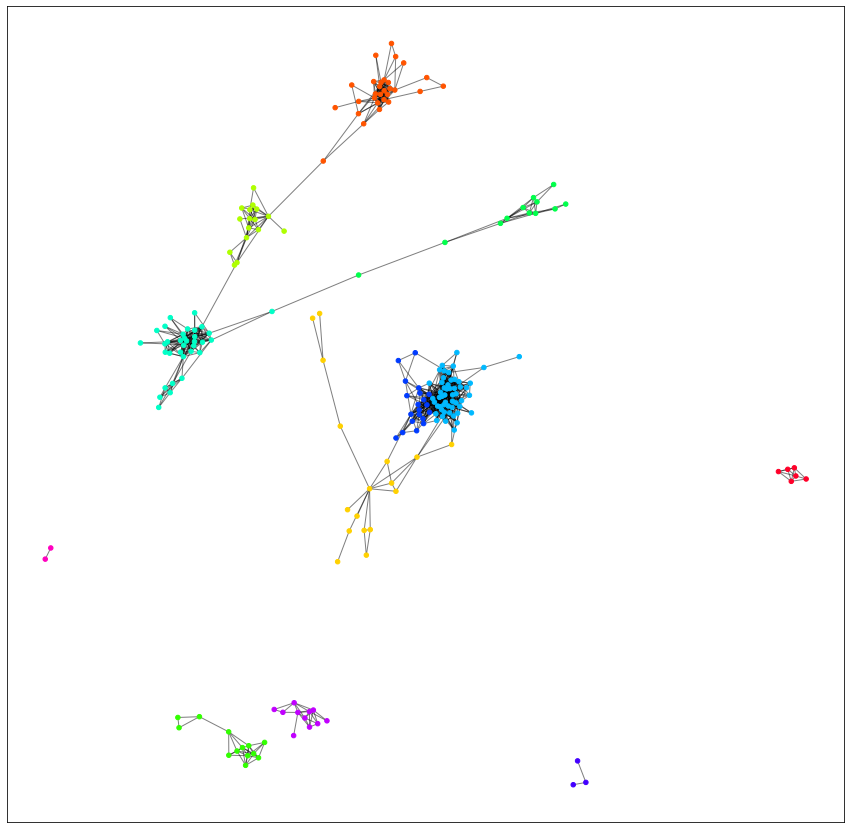

In [69]:
pos = nx.spring_layout(graph)
plt.figure(figsize=(15, 15))
cmap = cm.get_cmap('gist_rainbow', max(partition.values()) + 1)
nx.draw_networkx_nodes(graph, pos, partition.keys(), node_size=20, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(graph, pos, alpha=0.5)
plt.show()

визаулизируем сообщества

In [70]:
bw_centrality = nx.betweenness_centrality(graph, normalized=True)
bw_centrality

{227657: 0.0,
 413300: 0.04033353953154002,
 1601280: 0.03952779233373919,
 1687066: 2.8979207418677098e-05,
 1895348: 2.8979207418677098e-05,
 1990478: 0.011214953271028038,
 2058128: 0.0,
 2459486: 6.30297761356227e-05,
 2517874: 0.0,
 2583166: 0.0,
 2699093: 3.260160834601174e-05,
 2833128: 0.0,
 3363362: 0.0022381153102735366,
 3538796: 0.022326474124069243,
 3734345: 0.0,
 3848664: 4.493502102717491e-05,
 3864197: 0.011803638535870674,
 3905784: 8.69376222560313e-06,
 4217922: 0.007607041947402739,
 4311406: 0.08833630380356154,
 4422316: 0.0014774160008891595,
 4479411: 0.0,
 5325067: 1.7232278697177634e-05,
 5349199: 0.004784132769353367,
 5599901: 0.0007486831073197778,
 5751292: 0.00027519897330808,
 5938997: 0.0,
 6111900: 0.002422736045861458,
 6218698: 0.07548359052379917,
 6308154: 0.0,
 6407680: 0.005706530241957319,
 6516489: 0.000481234827195949,
 6769254: 0.017993506625485593,
 7038577: 0.023706598996689417,
 7066177: 0.007952181123230902,
 7278378: 2.5788044696977535e

In [71]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=200, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [72]:
G = graph
pos = nx.spring_layout(G, seed=675)

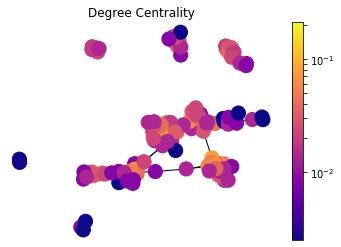

In [73]:
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

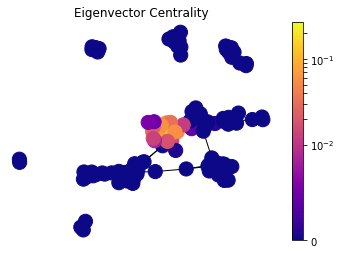

In [74]:
draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')

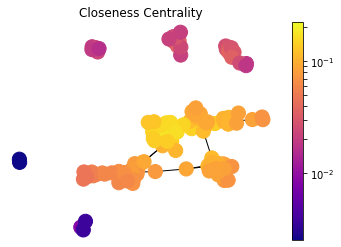

In [75]:
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')

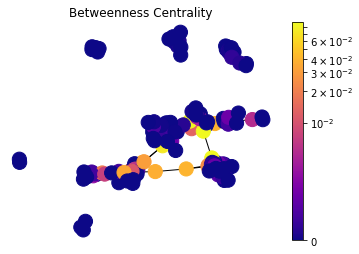

In [76]:
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')

Мне паказалось, что Eigenvector Centrality более информативен и показывает "степень важности" лишь некоторых вершин, что на самом деле "оправдывает" реальную ситуацию

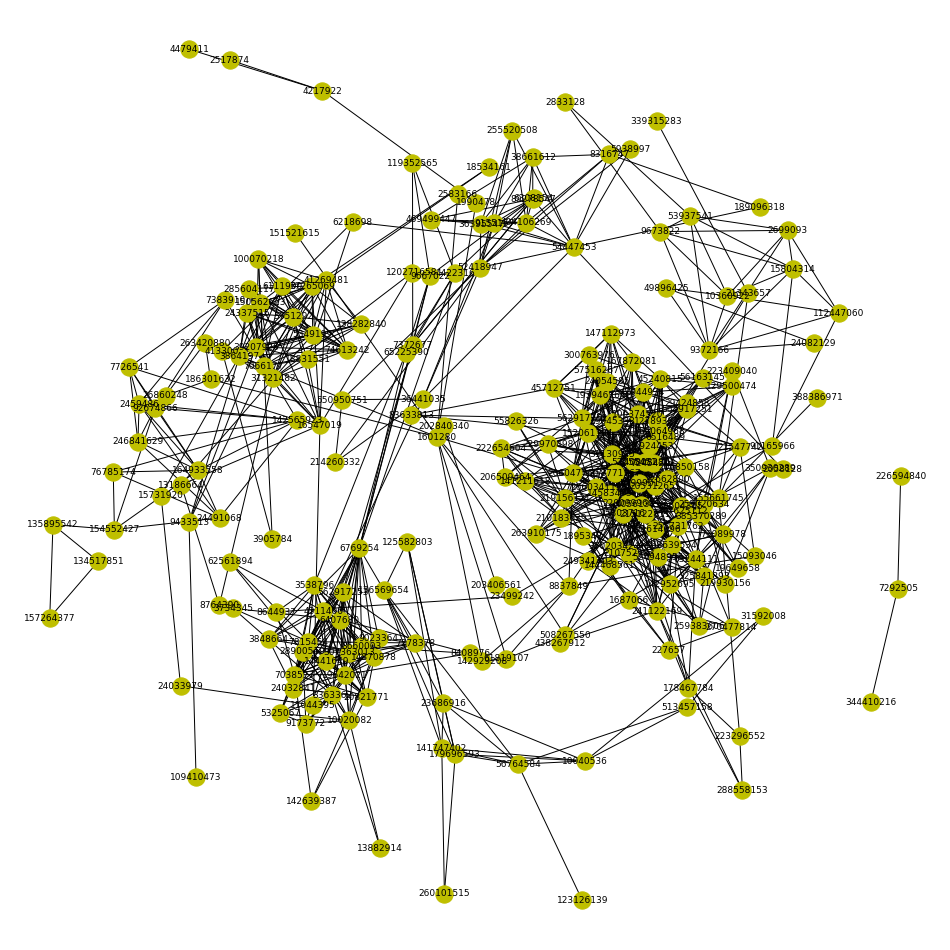

In [77]:
pos = nx.spring_layout(graph, scale = 4, k=0.16, iterations=20) 
plt.figure(figsize=(13, 13)) 
nx.draw(graph, pos, node_color='y', edge_color='black', edge_vmax = True, font_size= 9, with_labels=True)

В действительности, ярко выражено существование 3-х ообществ внутри графа, что отражает три круга "реальных сообществ": школьный, студенческий и рабочий. 

Спасибо за домашку, было интересно 

Куски кода брал отсюда и приспосабливал под себя
https://newtechaudit.ru/analiz-setej-s-ispolzovaniem-grafov/
https://aksakalli.github.io/2017/07/17/network-centrality-measures-and-their-visualization.html
https://github.com/semensorokin/SNA_2021/blob/master/week1/Loading%2BGraphs%2Bin%2BNetworkX.ipynb
https://github.com/semensorokin/SNA_2021/blob/master/week2/Marvel%20Universe%20Social%20Network.ipynb
